<a href="https://colab.research.google.com/github/Ismgh/Data-science-project/blob/master/Data_Science_Project_(M1_Paris_Saclay).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Project.
<h1>Binôme : Maftoul Omar, Ismgh Hatim.</h1> 
<h1>M1 INFO CILS.</h1>



# **Ensemble des données** [Bank Marketing](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

On a choisit un ensemble de données enregistrés issu d'une campagne publicitaire pour une institution banquaire portugaise. La campagne vise a augmenter le nombre des prospects de la banque en utilisant *le marketing téléphonique*. 
On peut catégoriser les exemples de l'ensemble en deux groupes :

1.   Prospects : Les personnes contactées par le service de la compagne, qui ont décider de créer un compte chez la banque et par conséquent ils sont devenues des prospects de la banque. 
2.   Non-Prospects : Les personnes contactées par le service de la compagne, mais ils n'ont pas créé un compte chez la banque et par conséquent ils ne sont pas considérés comme des prospects de la banque.



## Caractéristiques

On va définire les caractéristiques et l'étiquétte des exemples.  

### Variables



1.   **age** : L'age de la personne contactée (numérique).  
2.   **job** : le métier (catégorique). 
3.   **marital**: état matrimonial (catégorique).
4.   **education** : niveau d'éducation (catégorique).
5.   **default**: le client possède t'il un crédit ? (catégorique).
6.   **housing**: le client a t'il un prêt de logement ?  (catégorique)
7.   **loan**: le client a t'il un prêt personnel ? (catégorique)
#### Variables qui ont un lien avec le dernier contact de la campagne marketing actuelle 
8. **contact** : quel outil a t-on utilisé pour contacter le client ? (catégorique)
9. **month** : le mois  de l'année qui représente la dernière fois le client a été contacté (catégorique).
10. **day_of_week**: le jour  de la semaine qui représente la dernière fois le client a été contacté (catégorique).
11. **duration**: La durée du dernier contact avec le client en seconde. (numérique) .
#### Autres attributs :
12. **campaign**: Nombre de contact effectué durant la campagne actuelle pour le client (numérique).
13. **pdays**: Le nombre de jours passé depuis le dernier contact de la précédente campagne (numérique, la valeur 999 décrit que le client n'a pas été contacté auparavant).
14. **previous**: Nombre de contacts effectué avant la campagne actuelle pour le client actuel (numérique).
15. **poutcome**: résultat de la précédente campagne marketing (catégorique). 
#### Attributs qui ont un lien avec le contexte économique et sociale
16. **emp.var.rate**: Taux de variation de l'emploi - Indicateur trimestriel(numérique)
17. **cons.price.idx**: indice des prix à la consommation - Indicateur mensuel (numérique)
18. **cons.conf.idx**: 
indice de confiance du consommateur -  Indicateur mensuel (numérique)
19. **euribor3m**: référence *euribor* de 3 mois - indicateur quotidient (numérique)
20. **nr.employed**: nombre d'employés - Indicateur trimestriel(numérique)
###étiquette

21. **y** : La personne contactée est devenue prospect ou non.

# Mount Google Drive (because of the usage of Google Colab)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Import necessary libraries and installing packages 

In [0]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import silhouette_samples, silhouette_score # basic ML models
import matplotlib.pyplot as plt # data plotting
import seaborn as sns # data visualization 
import scipy # scientific computing library
%matplotlib inline
from scipy import stats
sns.set(color_codes=True)
!apt-get install swig -y
!pip install Cython numpy
from math import *
%matplotlib inline

# Pre Data-Analaysis : we will extract and clean our extracted data 

## Extraction des données

In [0]:
df = pd.read_csv('/content/drive/My Drive/Data/bank-additional-full.csv',sep=";")

## Utilisation de la fonction head() de panda afin de de voir les 6 premières ligne de notre dataframe

In [0]:
df.head(6)

age        job  marital  ... euribor3m nr.employed   y
0   56  housemaid  married  ...     4.857      5191.0  no
1   57   services  married  ...     4.857      5191.0  no
2   37   services  married  ...     4.857      5191.0  no
3   40     admin.  married  ...     4.857      5191.0  no
4   56   services  married  ...     4.857      5191.0  no
5   45   services  married  ...     4.857      5191.0  no

[6 rows x 21 columns]

## Looking at attributes quantiles, average and other information using panda's describe() funciton
Ceci prendra effet sur les attributs numériques. Les variables catégoriques ne seront pas inclus.

In [0]:
df.describe()

age      duration  ...     euribor3m   nr.employed
count  41188.00000  41188.000000  ...  41188.000000  41188.000000
mean      40.02406    258.285010  ...      3.621291   5167.035911
std       10.42125    259.279249  ...      1.734447     72.251528
min       17.00000      0.000000  ...      0.634000   4963.600000
25%       32.00000    102.000000  ...      1.344000   5099.100000
50%       38.00000    180.000000  ...      4.857000   5191.000000
75%       47.00000    319.000000  ...      4.961000   5228.100000
max       98.00000   4918.000000  ...      5.045000   5228.100000

[8 rows x 10 columns]

##Exploring categories of categorical attributes using panda's value_counts() and taking a look at how many rows belong to each categorical feature
 There is 11 categorical features : 
**job** , **marital**, **education**, **default**, **housing**, **loan**, **contact**, **month**, **day_of_week**, **poutcome**, **y**

In [0]:
print("Job:\n",df['job'].value_counts(),"\n")
print("marital:\n",df['marital'].value_counts(),"\n")
print("education:\n",df['education'].value_counts(),"\n")
print("housing:\n",df['housing'].value_counts(),"\n")
print("loan:\n",df['loan'].value_counts(),"\n")
print("contact:\n",df['contact'].value_counts(),"\n")
print("month:\n",df['month'].value_counts(),"\n")
print("day of week:\n",df['day_of_week'].value_counts(),"\n")
print("poutcome:\n",df['poutcome'].value_counts(),"\n")
print("y:\n",df['y'].value_counts(),"\n")

Job:
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

marital:
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

education:
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

housing:
 yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

loan:
 no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

contact:
 cellular     26144
telephone    15044
Name: contact, dtype: int64 

month:
 may    13769
jul     7174
aug     6178
jun

###### Explorer les types des données et le nombre de ligne qu'ils affectent en utilisant (panda's

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##### Comme on a pu le constaté, l'ensemble des données ne contient pas de valeurs nulles ou des lignes qui contient des colonnes vides

# Data Preparation : on va préparer les données afin d'appliquer les analyses après. 

##Séparer l'**étiquette** de l'ensemble des données 

In [0]:
df_new = df.drop("y", axis =1)
labels = df["y"]
print(labels)

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object


## Séparer les données numériques des données catégoriques 

D'abord on va traiter les données numériques

In [0]:
data_num = df_new[["age", "duration","campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]]

In [0]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 3.1 MB


vérification si il y'a  des valeurs manquantes dans l'ensemble des variables numérique

In [0]:
print('nombre totale des NA ')
print (data_num.isnull().sum())

nombre totale des NA 
age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64


###### Séparation des données catégoriques

In [0]:
data_cat = df_new[["job","marital","education","default","housing","loan", "contact", "month", "day_of_week", "poutcome"]]

#### Puisqu'on doit traiter les données, on aura besoin d'utiliser des valeurs numérique uniquement. On procèdra donc à convertir les variables catégoriques en variables numérique en utilisant Sklearn's OrdinalEconder

In [0]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)

###### on va visualiser le résultat du OrdinalEncoder en explorant la première ligne des données catégorique encodés

In [0]:
# print first row of encoded data
data_cat_encoded[:1]

array([[3., 1., 0., 0., 0., 0., 1., 6., 1., 1.]])

In [0]:
print("les differents catégories qui existent :")
ordinal_encoder.categories_

les differents catégories qui existent :


[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single', 'unknown'], dtype=object),
 array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['cellular', 'telephone'], dtype=object),
 array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep'], dtype=object),
 array(['fri', 'mon', 'thu', 'tue', 'wed'], dtype=object),
 array(['failure', 'nonexistent', 'success'], dtype=object)]

###### Après le traitement des données catégoriques, et la vérification des données nulles et des lignes vides, on va concaténer les données catégoriques et numériques 

In [0]:
# Convert Encoded categorical data from array to dataframe 
cat_data_encoded = pd.DataFrame(data_cat_encoded, columns=data_cat.columns)
# Concatenate numerical data and categorical data and use it as our new dataFrame, axis =1 means that we want to meconcatrge in the level of columns
new_df = pd.concat([data_num, cat_data_encoded], axis=1)
# output quantiles and basic statistics about our new dataframe
new_df.describe()

age      duration  ...   day_of_week      poutcome
count  41188.00000  41188.000000  ...  41188.000000  41188.000000
mean      40.02406    258.285010  ...      2.004613      0.930101
std       10.42125    259.279249  ...      1.397575      0.362886
min       17.00000      0.000000  ...      0.000000      0.000000
25%       32.00000    102.000000  ...      1.000000      1.000000
50%       38.00000    180.000000  ...      2.000000      1.000000
75%       47.00000    319.000000  ...      3.000000      1.000000
max       98.00000   4918.000000  ...      4.000000      2.000000

[8 rows x 20 columns]

In [0]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
 10  job             41188 non-null  float64
 11  marital         41188 non-null  float64
 12  education       41188 non-null  float64
 13  default         41188 non-null  float64
 14  housing         41188 non-null  float64
 15  loan            41188 non-null  float64
 16  contact         41188 non-null  float64
 17  month           41188 non-null 

In [0]:
new_df.head(5)

age  duration  campaign  pdays  ...  contact  month  day_of_week  poutcome
0   56       261         1    999  ...      1.0    6.0          1.0       1.0
1   57       149         1    999  ...      1.0    6.0          1.0       1.0
2   37       226         1    999  ...      1.0    6.0          1.0       1.0
3   40       151         1    999  ...      1.0    6.0          1.0       1.0
4   56       307         1    999  ...      1.0    6.0          1.0       1.0

[5 rows x 20 columns]

# Data visualziation and insights : Visualisation des données

###### Visualisation des histogrammes pour chaque variable afin d'afficher une valeur donnée (Axe des X) en fonction du nombre d'instances (Axe des Y)

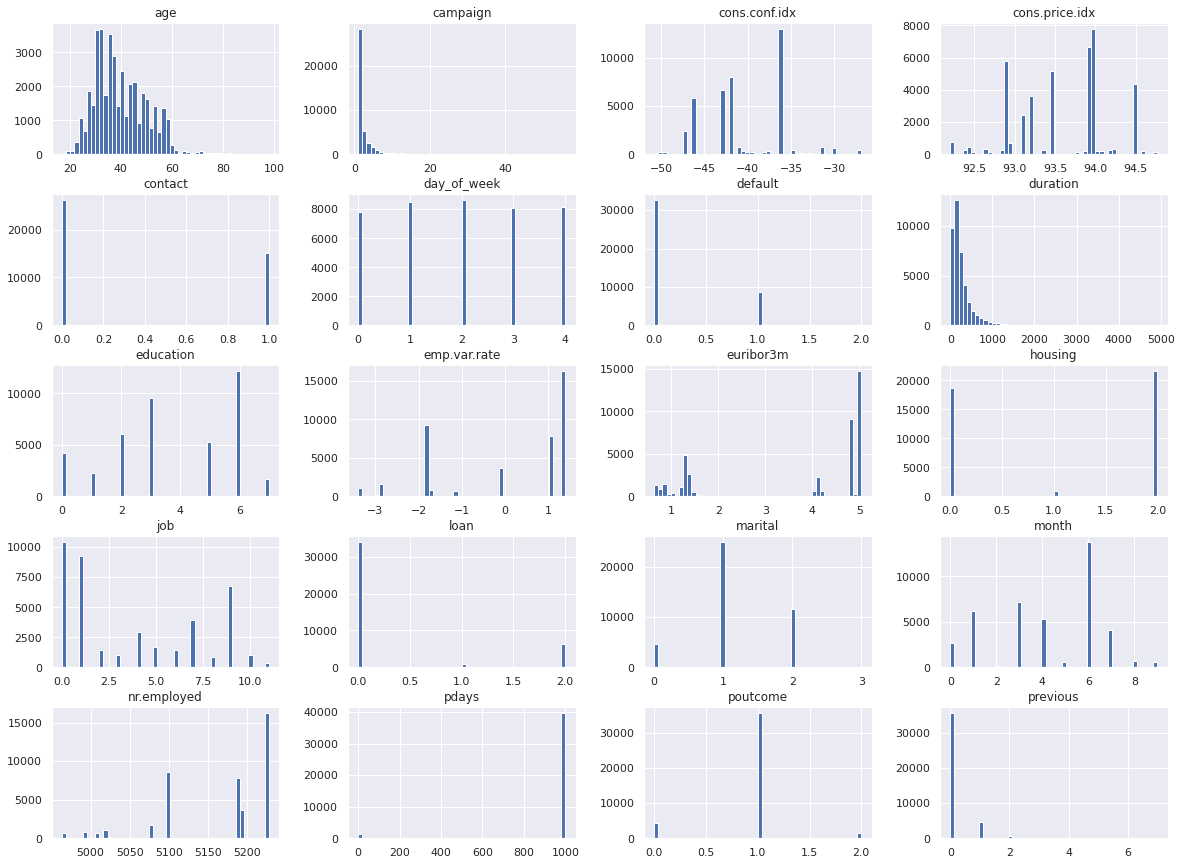

In [0]:
new_df.hist(bins=50, figsize=(20,15))
plt.show()

###### Visualiser les relations entre les variables et les distributions de ces dernières en utilisant de Seaborn's Pairplot

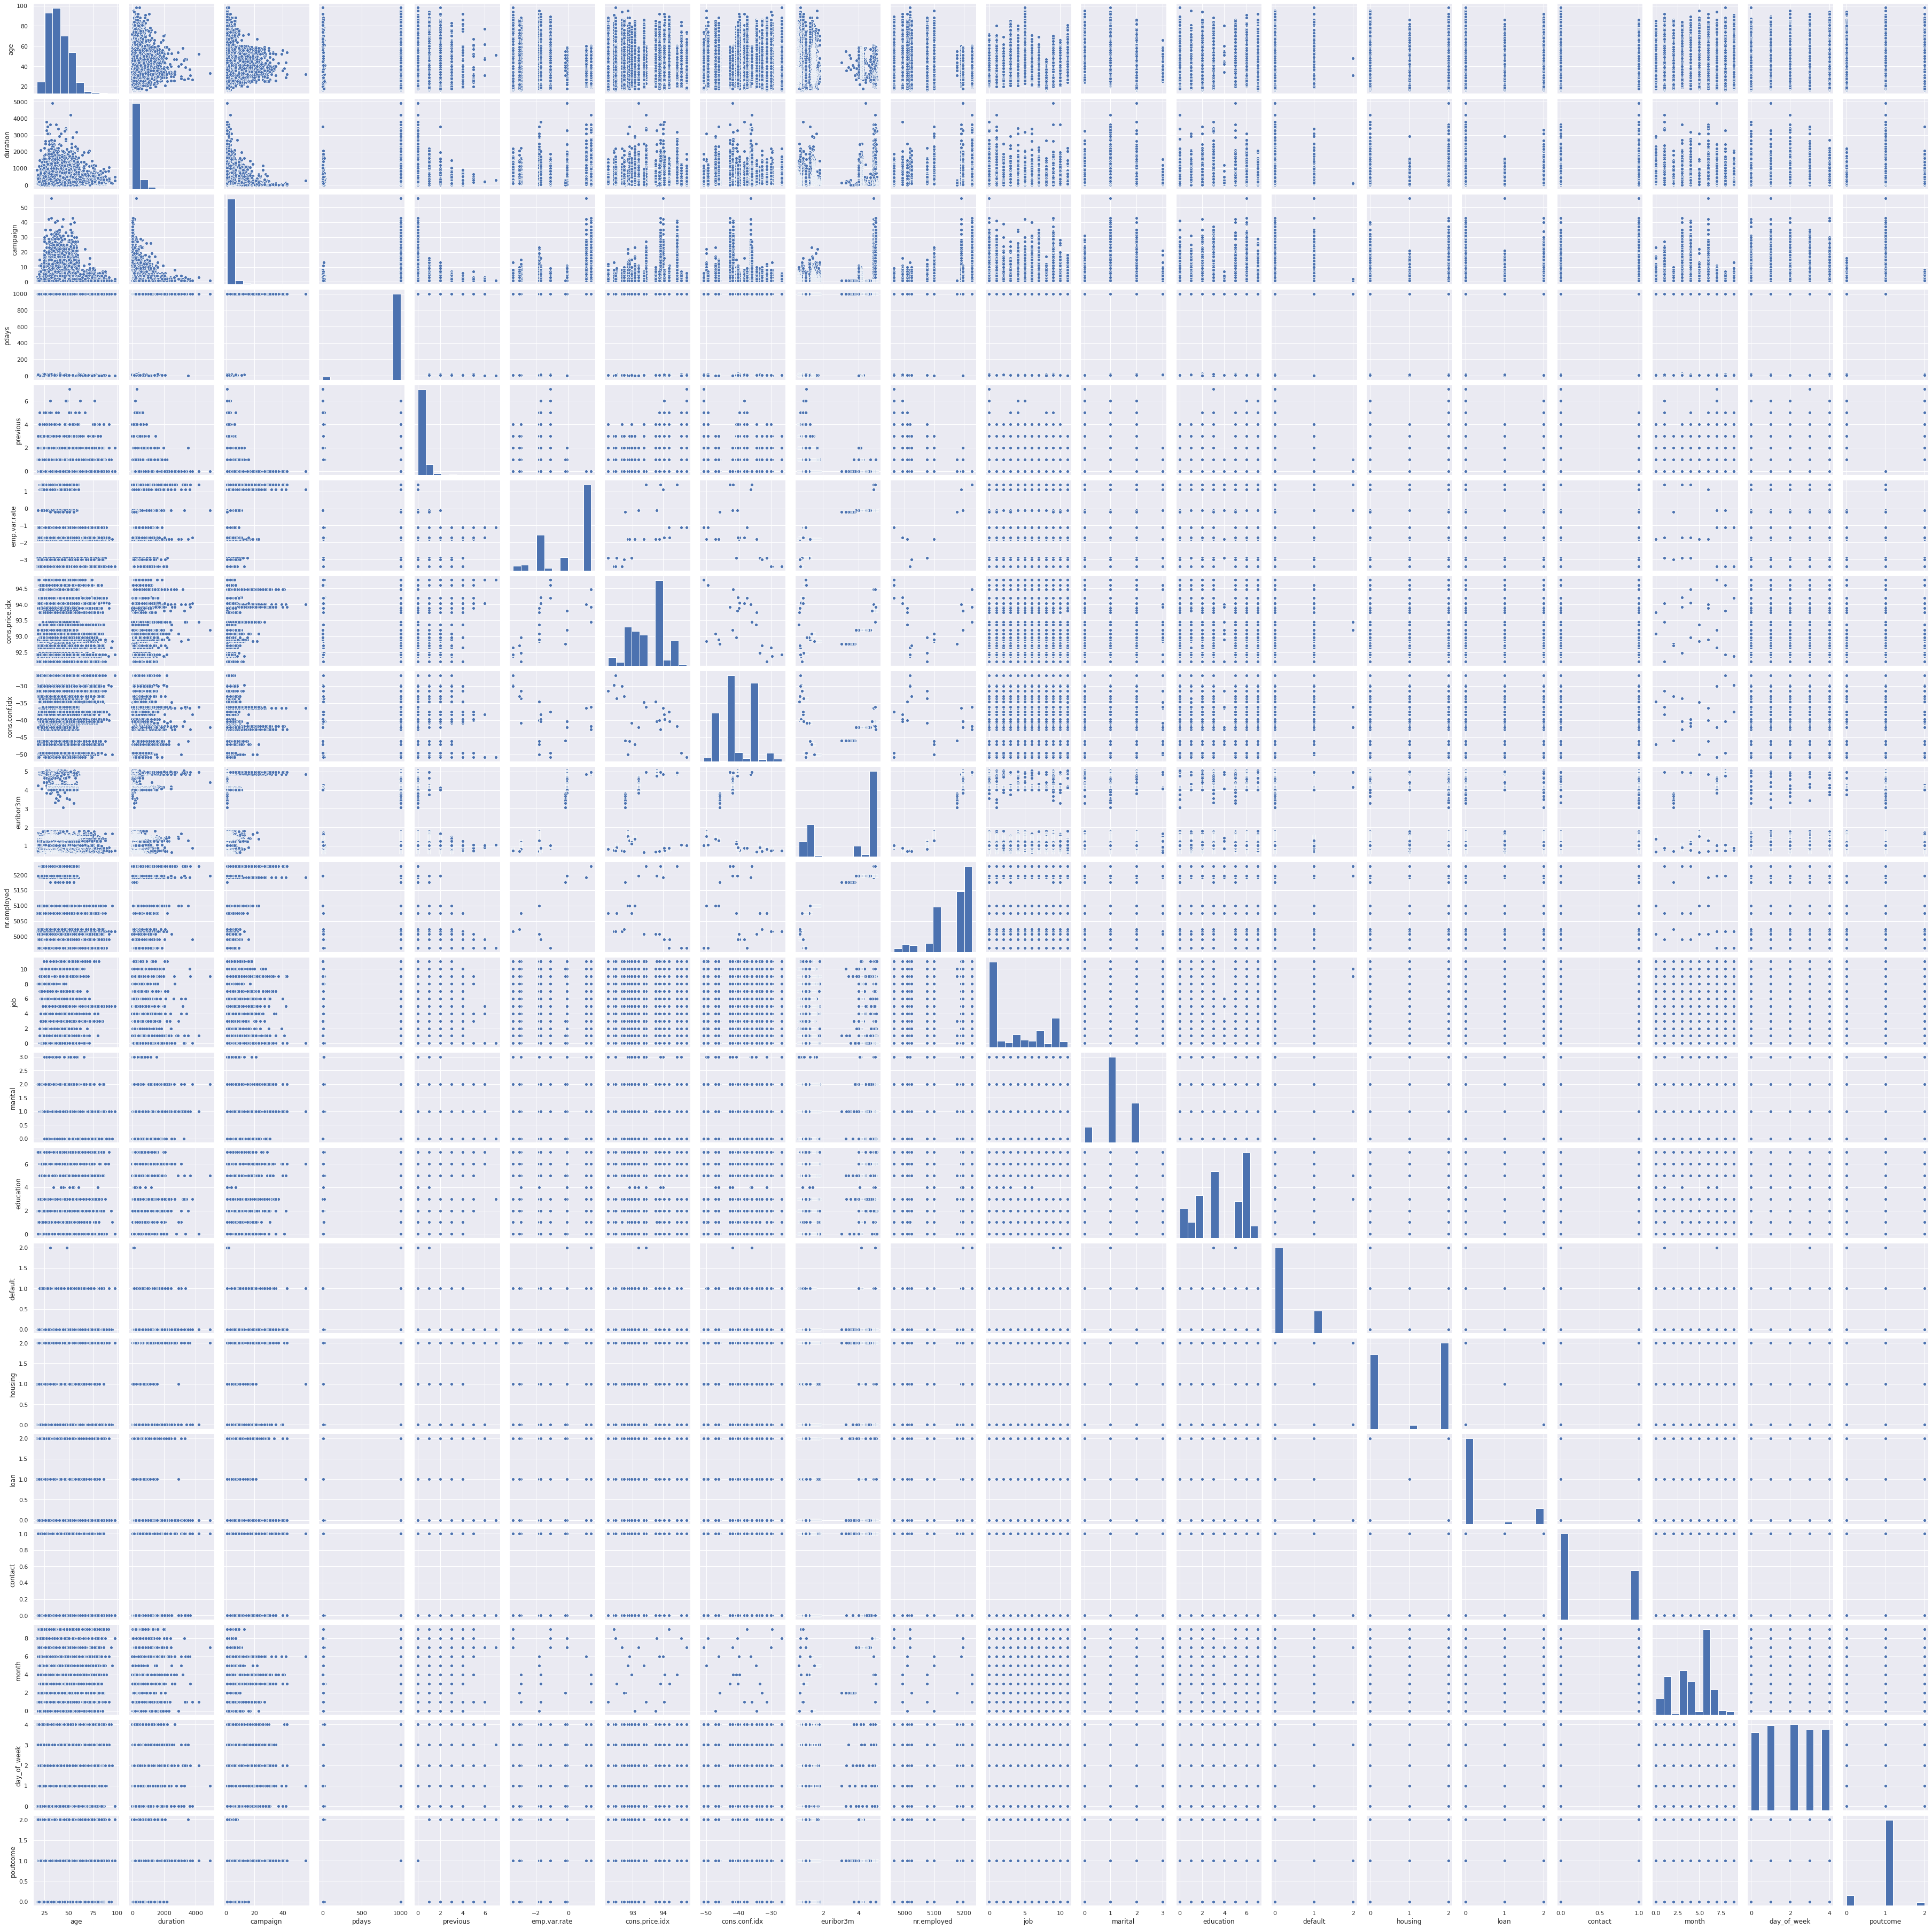

In [0]:
sns.pairplot(new_df)

#### On va centrer réduire les données afin d'utiliser cette matrice ultérieurement dans le calcul des correlations ou bien dans la réduction dimmentionnel des données en utilisant l'ACP (PCA)
##### 1. On va commencer par le faire en la programmant à la main, puis en utilisant sklearn's StandardScaler . En va afficher ensuite les 4 première ligne de la matrice centrée réduite en utilisant seaborn afin qu'on puisse avoir une vue plus clair qu'on utilisant print().
$ Standard Matrix = \begin{bmatrix}
\frac{X_{11} - avg(X_1)}{\sigma_{X_1}} &\cdots &\frac{X_{1c} - avg(X_c)}{\sigma{X_c}}\\
\vdots & \ddots & \vdots\\
\frac{X_{n1} - avg(X_1)}{sigma_{X_1}} & \cdots &\frac{X_{nc}-avg(X_c)}{\sigma{X_c}} 
\end{bmatrix}\\
$

###### Pour chaque variable , calculer la moyenne et la variance (en utilisant statistics library ) 

In [0]:
import statistics as st
avgs_df = [st.mean(new_df[column]) for column in new_df.keys()]
variances_df = [st.variance(new_df[column]) for column in new_df.keys()]

###### Calculer la matrice centrée réduite (Hand Made method)

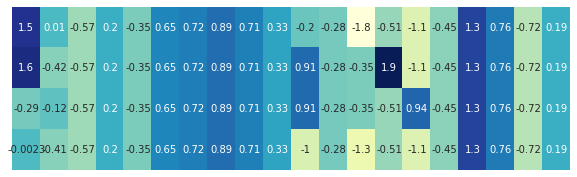

In [0]:
#Initilize matrix
standard_matrix_df = []
# for each column in dataframe
for index, column in enumerate(new_df.keys()):
  #initilize a list that represents the line of our matrix
  line = []
  #for each value extraceted from each column's data
  for value in new_df[column].values:
    #calculate every element of the line of the matrix like we've formulated in StandardMatrix matrice
    line.append( (value-avgs_df[index])/sqrt(variances_df[index]) )
    # each calculated line, add it on the matrix
  standard_matrix_df.append(line)
  # transform the array of array to an np_matrix, we've used transpose because we've calculated each element based on the dataframes column.
hand_made_scaled_df = np.asmatrix(standard_matrix_df).transpose()
plt.figure(figsize=(10, 3))
# plot the matrix in a nice looking way using seaborn
sns.heatmap(hand_made_scaled_df[0:4], cmap="YlGnBu", annot=True, cbar=False,xticklabels=False, yticklabels=False)

###### Calculer la matrice centré réduite en utilisant sklearn's StandardScaler (afin de vérifier notre calcul) 

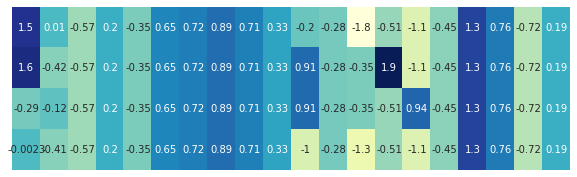

In [0]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

scaled_data_df = std_scaler.fit_transform(new_df)
plt.figure(figsize=(10, 3))
sns.heatmap(scaled_data_df[0:4], cmap="YlGnBu", annot=True, cbar=False,xticklabels=False, yticklabels=False)

# PCA Visualziation 

###### Il est difficile de visualiser les données qu'on possède, et surtout quand il s'agit de 20 variables comme dans notre cas. Ceci implique à avoir des  données avec une dimension plus élevé. C'est la raison pour laquelle on va calculer les composantes principales et utiliser celles qui peuvent nous fournir plus d'information. Après ce calcul, on pourra visualiser les données selon la réduction dimentionnel qu'on veut et qu'on a effectué, et ceci en utilisant scatter-plot. 

###### On va instancier un Objet PCA ( from sklearn's PCA ). Les princpaux paramètres de cet objet sont le nombre maximal de composantes, qui sera dans notre cas égale aux nombres de variables dans notre dataframe (20 variables) 


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(new_df.columns))
scaled_pca_df = pca.fit_transform(scaled_data_df) # we can use also our handmade standardMatrix (hand_made_scaled_df)

In [0]:
scaled_data_df.shape

(41188, 20)

In [0]:
scaled_pca_df.shape

(41188, 20)

In [0]:
new_df.shape

(41188, 20)

###### On a utilisé la variable y comme label. 
###### Factoriser y : correspondre 0 à no et 1 à yes en utilisant using Pandas' dummy

In [0]:
df_2 = new_df.copy(deep=True)
codes , data_categories =  pd.factorize(df['y'])
df_2['y'] = codes

In [0]:
df_2.describe()

age      duration  ...      poutcome             y
count  41188.00000  41188.000000  ...  41188.000000  41188.000000
mean      40.02406    258.285010  ...      0.930101      0.112654
std       10.42125    259.279249  ...      0.362886      0.316173
min       17.00000      0.000000  ...      0.000000      0.000000
25%       32.00000    102.000000  ...      1.000000      0.000000
50%       38.00000    180.000000  ...      1.000000      0.000000
75%       47.00000    319.000000  ...      1.000000      0.000000
max       98.00000   4918.000000  ...      2.000000      1.000000

[8 rows x 21 columns]

In [0]:
print(df_2['y'].value_counts())
print(df['y'].value_counts())

0    36548
1     4640
Name: y, dtype: int64
no     36548
yes     4640
Name: y, dtype: int64


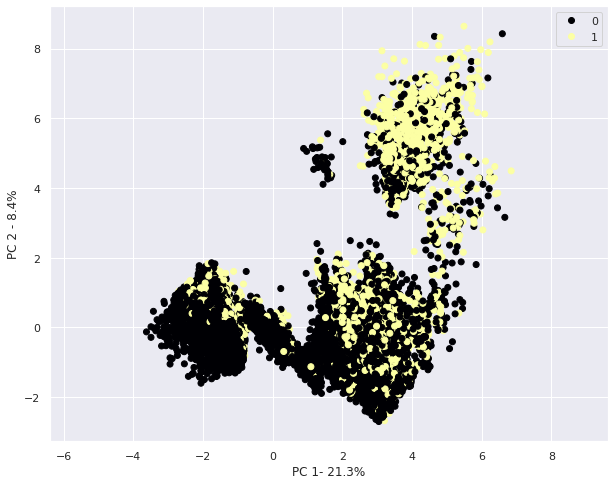

In [0]:
per_var = np.round(pca.explained_variance_ratio_ *100,decimals = 1)
plt.figure(figsize=(10,8))
scatter=plt.scatter(scaled_pca_df[:,0],scaled_pca_df[:,1],c= df_2['y'], cmap='inferno')
plt.axis('equal')
plt.xlabel('PC 1- {0}%'.format(per_var[0])) #First Principal Component
plt.ylabel('PC 2 - {0}%'.format(per_var[1])) #Second Principal Component
labels = np.unique(df_2['y'])
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels)
plt.show()

Les individus qui appartiennent à deux classes différentes sont beaucoup plus proches. Il est donc difficile de classifier **tous les individus** en utilisant ce plan car on a perdu 70% d'informations, mais on peut maximiser la justesse (nombre_des_prédictions_correctes/nombre_total_d_exemplaires)  en séparant les deux groupes par une ligne diagonnale qui passe par le point (0,10). 

### Intérprétation des composantes principales

On voudra savoir le pourcentage d'informations qu'on a gardé lorsqu'on a réduit la dimention.

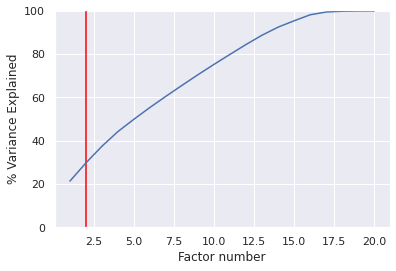

In [0]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Factor number')
plt.axvline(x=2.0,color='red')
plt.ylim(0,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(np.arange(1,21),cumulative_var)

#### On va afficher dans un histogramme les taux de variance des differentes composantes qu'on a calculé. Ces derniers décrivent le pourcentage de la variance de l'ensemble du dataframe, et chaque composante principale possède un pourcentage ou un taux de variance (La composante qui correspond au plus grand pourcentage est la meilleure à représenter les données, car elle a moins de perte d'information lorsqu'on a projeté les données sur cette composante)

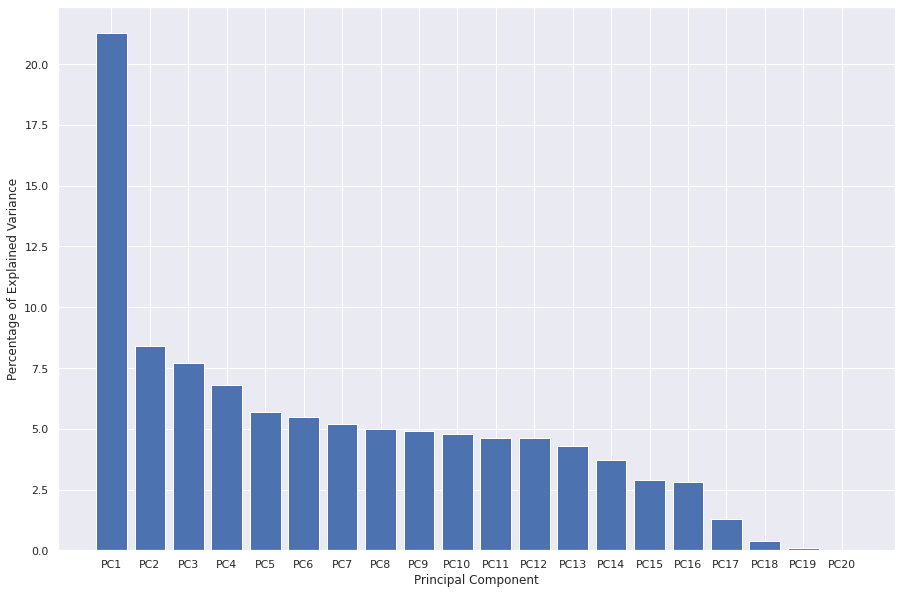

In [0]:
plt.figure(figsize=(15,10))
per_var = np.round(pca.explained_variance_ratio_ *100,decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.show()

#### Visualiser la variance cummulative (cummulative explained variances) des composantes principales

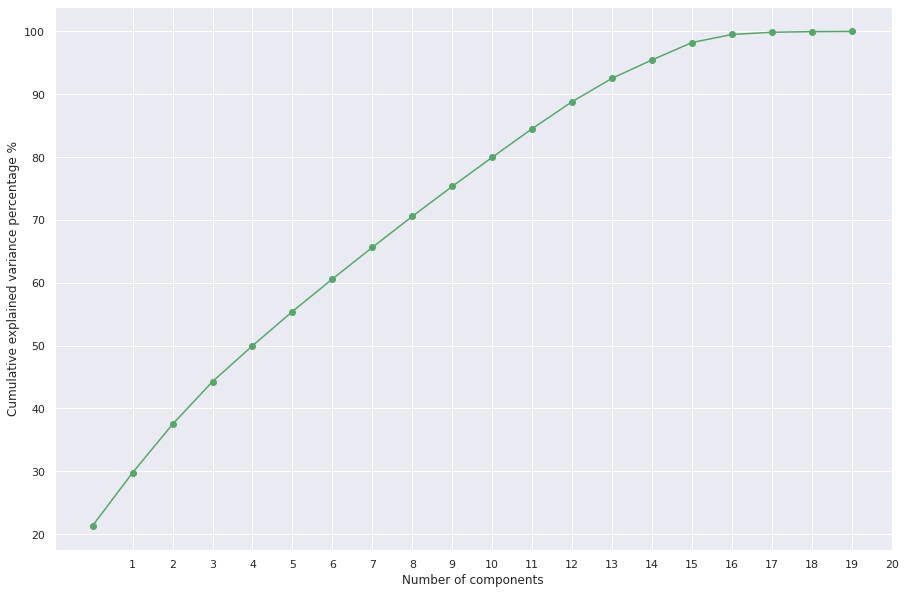

In [0]:
plt.figure(figsize=(15,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100,marker='o', color='g')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance percentage %')
_ =plt.xticks(np.arange(1,df.shape[1]))

###### La variance cumulative et le taux de variance par composante principale nous ont permis de voir le nombre des composantes qu'on besoin afin de décrire nos données. 
###### Dans notre cas, on a besoins de 11 composantes pour bénéficier de 80% de la variance de l'ensemble des données, et nous avons besoin de 20 composantes pour décrire 100% de la variance.


#### Visualtion de la correlation entre les composantes principales et les variables en utilisant seaborn's heatmap.

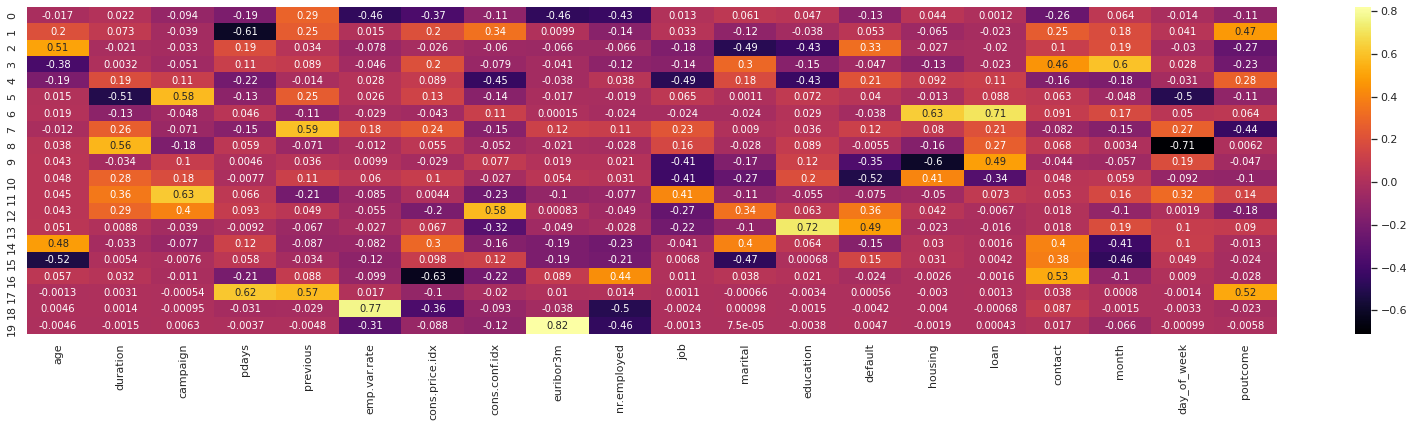

In [0]:
scaled_d_df = pd.DataFrame(pca.components_,columns=new_df.columns)
plt.figure(figsize=(28,6))
sns.heatmap(scaled_d_df,cmap='inferno', annot=True)

#### Calculer la matrice qui représente la correlation entre les variables et les axes principaux et visualiser les 4 première ligne de la matrice en utlisant seaborn

In [0]:
sqrt_cor_var = np.sqrt(pca.explained_variance_)
corvar = np.zeros((new_df.shape[1],new_df.shape[1]))
for k in range(new_df.shape[1]):
    corvar[:,k] = pca.components_[k,:] * sqrt_cor_var[k]

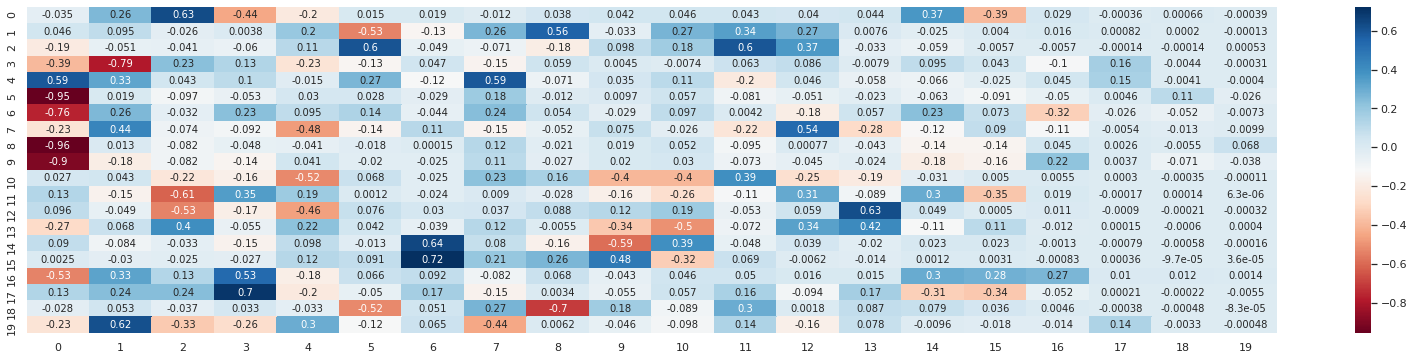

In [0]:
plt.figure(figsize=(28,6))
sns.heatmap(np.asmatrix(corvar),cmap='RdBu', annot=True)

On a reserver 30% des informations, on va maintenant afficher le cercle de correlation qui va nous permettre de deduire la correlation entre les attribues les mieux représenté par ces deux axes.

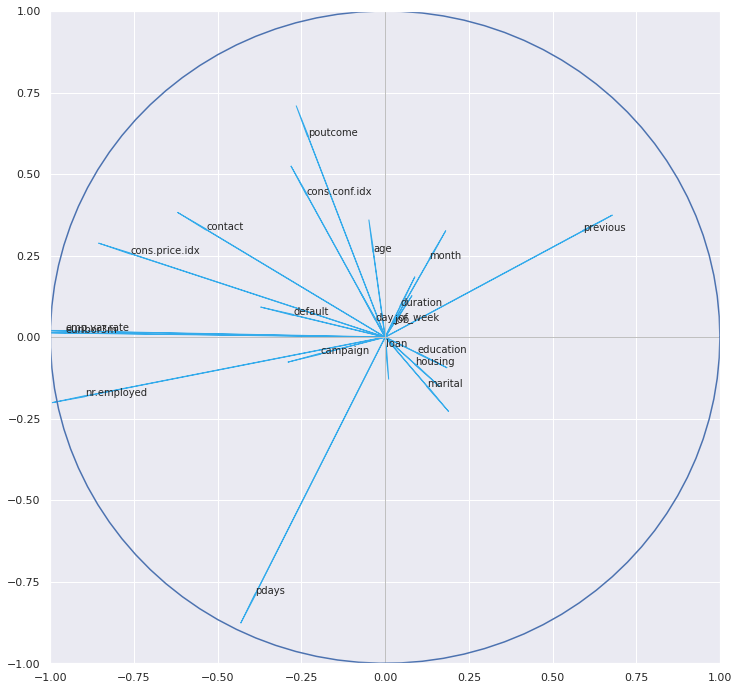

In [0]:
(fig, ax) = plt.subplots(figsize=(12, 12))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

for j in range(new_df.shape[1]):
     plt.annotate(new_df.columns[j],(corvar[j,0],corvar[j,1]))
     ax.arrow(0,
             0,  # Start the arrow at the origin
             corvar[j,0],  #0 for PC1
             corvar[j,1],  #1 for PC2
             head_length=0.1,
             color="#34abeb")
# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an)) 
# Print the correlation circle
plt.show()

On a mentionné que PC1 + PC2 représentent presque 30% de la variance ( ce qui ne représente pas grand chose). En revanche, ceci ne nous empêche pas d'avoir une visualisation des données.
Ce cercle de correlation décrit les relations entre les variables ( chaque angle entre deux vecteur indique la manière dont les variables sont approximativement corrélées).
A titre d'exmemple, on peut aprecevoir que les variables liés à la durée ( **month**,**day_of_week**n **month**) sont bien corrélé entre eux, en revanche leurs taux correlations ne dépase pas 25% (positiviement) le premier axe principale).
Il n'existe aucune relation linéaire entre les variables **pdays** et **previous**.
La variable **emp.var.rate** est fortement corrélée négativement avec le premier axe principale.

#### Contribution relative des individus aux axes (visualisation des 4 premières contributions) (Relative contribution of individuals to axes)

In [0]:
rows = scaled_pca_df.shape[0]
corrected_variance_matrix = ((rows-1)/rows)*pca.explained_variance_
# initialize dictionary
contribution = {"PC1" : [], "PC2" : [], "PC3" : [],"PC4" : [], "PC5" : [], "PC6" : [],"PC7" : [], "PC8" : [], "PC9" : [],"PC10" : [], "PC11" : [], "PC12" : [],"PC13" : [], "PC14" : [], "PC15" : [],"PC16" : [], "PC17" : [], "PC18" : [],"PC19" : [], "PC20" : []}

for individual, score in enumerate(scaled_pca_df):
    # score[i] is the score of current individual in the ith axis 
    # corrected_variance_matrix[i] is the ith eigenvalue
    for index, value in enumerate(corrected_variance_matrix):
      ctr_ith_axe = pow(score[index],2)/(rows * corrected_variance_matrix[index])*100
       # add the contribution with it's corresponding axis
      contribution["PC"+str(index+1)].append(ctr_ith_axe)
# transform contribution to dataframe to visualize it 
contribution_to_individuals = pd.DataFrame(contribution, columns = contribution.keys())
contribution_to_individuals.head(5)

PC1       PC2       PC3  ...      PC18      PC19      PC20
0  0.001518  0.002148  0.004441  ...  0.000006  0.001069  0.000303
1  0.002036  0.002517  0.004771  ...  0.000003  0.000753  0.000417
2  0.001175  0.000700  0.000014  ...  0.000001  0.000637  0.000262
3  0.001467  0.001006  0.001160  ...  0.000004  0.000930  0.000463
4  0.001361  0.001917  0.001064  ...  0.000007  0.000929  0.000196

[5 rows x 20 columns]

In [0]:
print("Le premier individu contibue à {0} % pour la définition du premier axe PC1, et à {1} % pour définir le vingtième axe PC20".format(round(contribution_to_individuals["PC1"][0],4),round(contribution_to_individuals["PC20"][0],4)))
print("Les contributions totales pour tous les individus à la définition de la composante principale PC1 est {0} %".format(sum(contribution_to_individuals["PC1"])))

Le premier individu contibue à 0.0015 % pour la définition du premier axe PC1, et à 0.0003 % pour définir le vingtième axe PC20
Les contributions totales pour tous les individus à la définition de la composante principale PC1 est 99.9999999999995 %


#### Contribution relative des axes aux individus Relative contribution of axes to individuals
$contirbution = \frac{(inertia_{axe}^{individual})^2}{\sum (inertia_{axe})^2}$

In [0]:
contribution_2 =  {"PC1" : [], "PC2" : [], "PC3" : [],"PC4" : [], "PC5" : [], "PC6" : [],"PC7" : [], "PC8" : [], "PC9" : [],"PC10" : [], "PC11" : [], "PC12" : [],"PC13" : [], "PC14" : [], "PC15" : [],"PC16" : [], "PC17" : [], "PC18" : [],"PC19" : [], "PC20" : []}
for individual, score in enumerate(scaled_pca_df):
    # score[i] is the score of current individual in the ith axis 
    # sum(score) is the sum of squared scores for each individual
    score = [pow(value,2) for value in score]
    for i in range(0,scaled_pca_df.shape[1]):
      ctr__axe = pow(score[i],2)/sum(score)
      # add the contribution with it's corresponding axis
      contribution_2["PC"+str(i+1)].append(ctr__axe)

In [0]:
contribution_to_axes = pd.DataFrame (contribution_2, columns = contribution_2.keys())
contribution_to_axes.head(5)

PC1       PC2       PC3  ...          PC18      PC19          PC20
0  0.552515  0.172229  0.616295  ...  2.247820e-09  0.000006  5.910099e-08
1  0.870307  0.207073  0.622456  ...  5.413850e-10  0.000003  9.796637e-08
2  0.521232  0.028802  0.000009  ...  1.126836e-10  0.000004  6.966302e-08
3  0.644357  0.047191  0.052470  ...  1.566293e-09  0.000006  1.726216e-07
4  0.359820  0.111230  0.028706  ...  2.283090e-09  0.000004  1.999962e-08

[5 rows x 20 columns]

# Clustring

## Appliction de l'algorithme **KMEAN** sur l'ensemble des données pour en déduire les classes en utilisant la fonction silhouhette

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.6327709925072167
For n_clusters = 3 The average silhouette_score is : 0.6875734692212175
For n_clusters = 4 The average silhouette_score is : 0.565053337767976
For n_clusters = 5 The average silhouette_score is : 0.4816857645358967
For n_clusters = 6 The average silhouette_score is : 0.4537694885915561


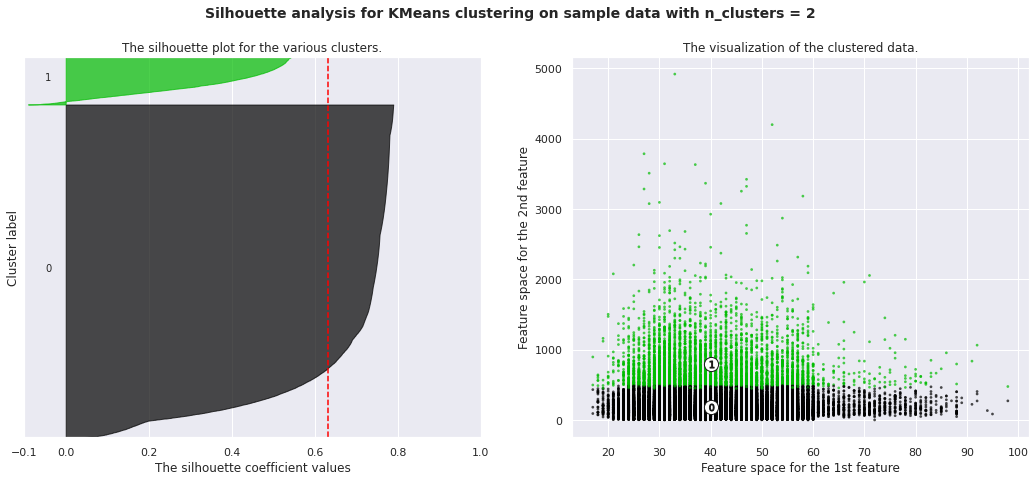

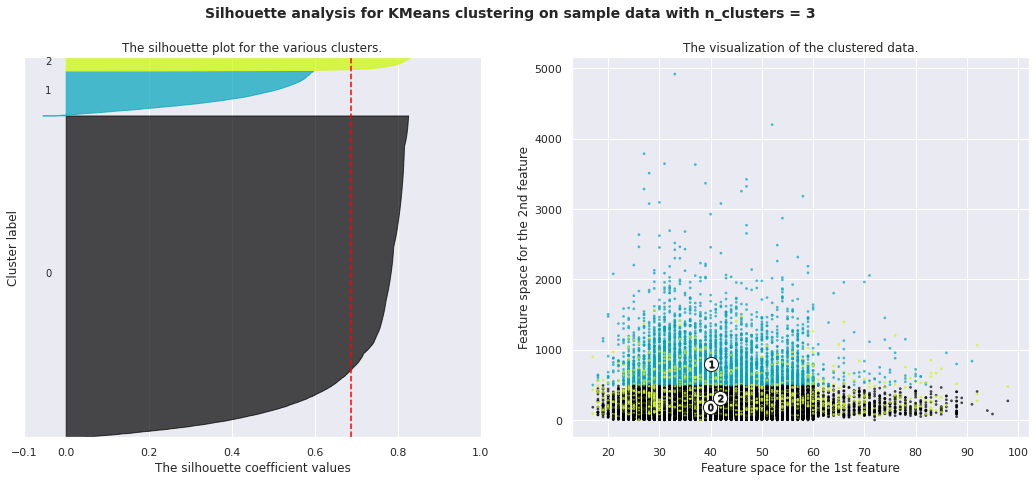

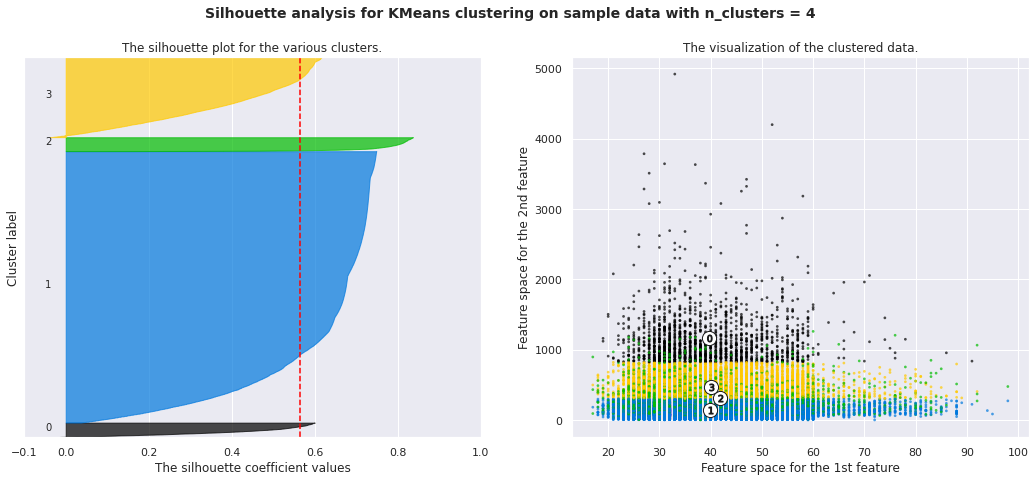

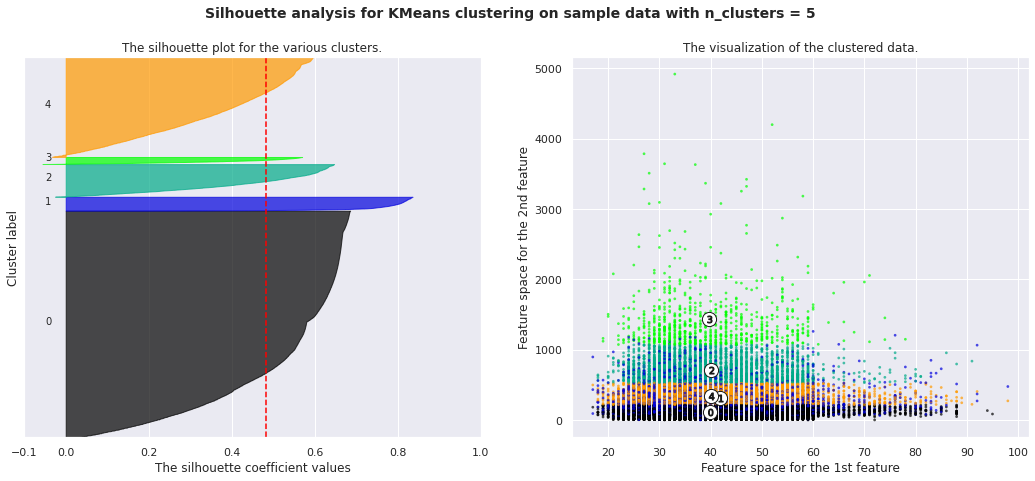

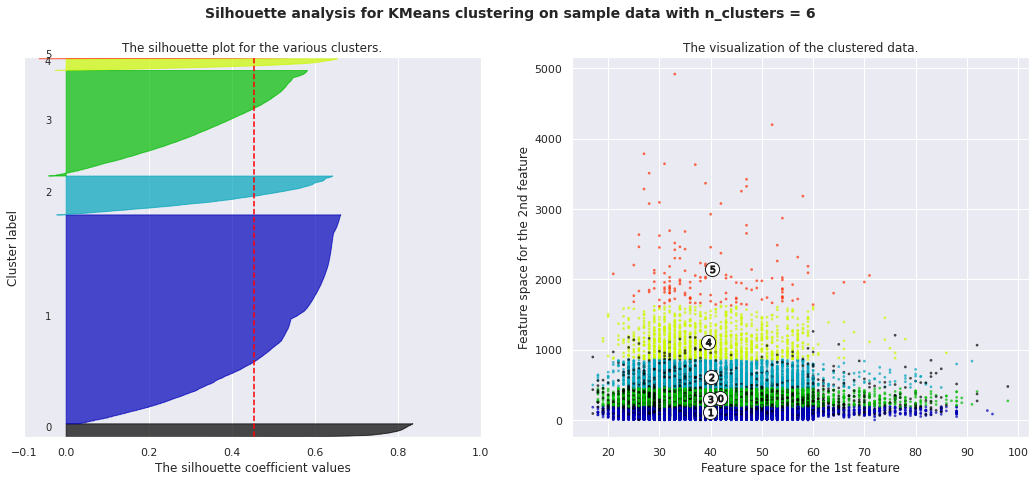

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=pd.DataFrame(new_df).to_numpy()

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Appliction de l'algorithme Hierarchical clustering sur l'ensemble des données pour en déduire les classes en utilisant la fonction silhouhette

In [0]:
#Import the hierarcical clustering library
from sklearn.cluster import AgglomerativeClustering

# Use the silhouette function to find the optimal number of clusters  for hierarchical clustering
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters = n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.6758182536533712
For n_clusters = 3 The average silhouette_score is : 0.6966449329420621
For n_clusters = 4 The average silhouette_score is : 0.44518982494140524
For n_clusters = 5 The average silhouette_score is : 0.4510806313696386
For n_clusters = 6 The average silhouette_score is : 0.4420554886488156


## Application de **KMEANS** sur l'ensemble des donées d'origine

D'aprés le test précedent en utilisant l'algorithme **KMEANS** et **HIERARCHICAL CLUSTRING** on a eu le meilleur score en utilisant 3 clusters donc on va appliquer l'algorithme **KMEANS** sur l'ensemble des données en utilisant 3 clusters

In [0]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=3, random_state=10)
X=pd.DataFrame(new_df).to_numpy()
cluster_labels = clusterer.fit_predict(X)

## Visualisation des clusters sur le plan obtenu par l'ACP 

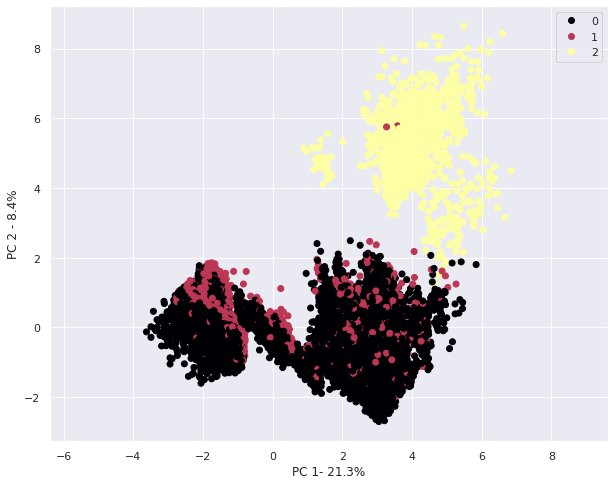

In [0]:
per_var = np.round(pca.explained_variance_ratio_ *100,decimals = 1)
plt.figure(figsize=(10,8))
scatter=plt.scatter(scaled_pca_df[:,0],scaled_pca_df[:,1],c= cluster_labels, cmap='inferno')
plt.axis('equal')
plt.xlabel('PC 1- {0}%'.format(per_var[0])) #First Principal Component
plt.ylabel('PC 2 - {0}%'.format(per_var[1])) #Second Principal Component
labels = np.unique(cluster_labels)
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels)
plt.show()

## justesse après fusionnement (voir comparaison pour comprendre)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(df_2['y'],np.where(cluster_labels==2, 1, cluster_labels))

0.8740167038943382

## Appliction de l'algorithme **KMEAN** sur l'ensemble des données représentées dans le nouvel espace obtenu par l'ACP pour en déduire les classes en utilisant la fonction silhouhette

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=pd.DataFrame(scaled_pca_df[:,0:2]).to_numpy()

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.6572127544257126
For n_clusters = 3 The average silhouette_score is : 0.6953884520925039
For n_clusters = 4 The average silhouette_score is : 0.5476756940864019
For n_clusters = 5 The average silhouette_score is : 0.528527861567698


## Application de KMEANT sur l'ensemble des donées d'origine représentées dans le nouvel espace obtenu par l'ACP

In [0]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=3, random_state=10)
X=pd.DataFrame(scaled_pca_df[:,0:2]).to_numpy()
cluster_labels = clusterer.fit_predict(X)

## Visualisation des clusters sur le plan obtenu par l'ACP 

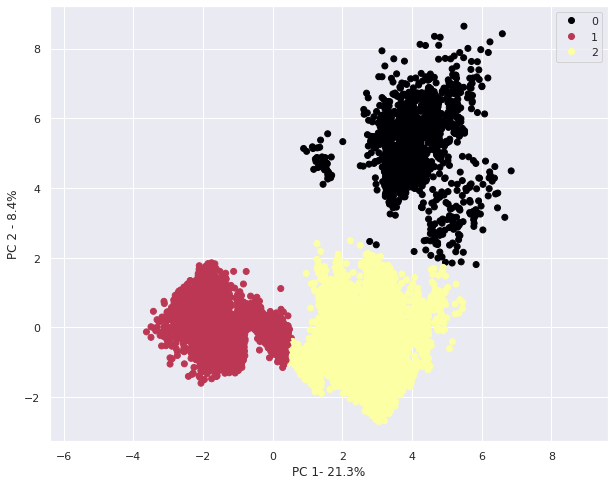

In [0]:
per_var = np.round(pca.explained_variance_ratio_ *100,decimals = 1)
plt.figure(figsize=(10,8))
scatter=plt.scatter(scaled_pca_df[:,0],scaled_pca_df[:,1],c= cluster_labels, cmap='inferno')
plt.axis('equal')
plt.xlabel('PC 1- {0}%'.format(per_var[0])) #First Principal Component
plt.ylabel('PC 2 - {0}%'.format(per_var[1])) #Second Principal Component
labels = np.unique(cluster_labels)
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels)
plt.show()

## justesse aprés fusionnement (voire comparaison pour comprendre)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(df_2['y'],np.where(cluster_labels==2, 1, cluster_labels))

0.10257842089929106

## Comparaison

L'algorithme n'a pu obtenir le nombre exacte des classes en utilisant les deux méthodes, en revnahce, la classification en utilisant la première méthode est meilleure que la classification en utilisant la seconde méthode, car si on fusionne le cluster 1 et le cluster 2 en un seul cluster (qui représente les individus qui ont l'étiquette 1 et le cluster 0 représente les individus qui ont l'étiquette 0)  on va acuqérir plus de justesse que si on effectue la même oprération sur les clusters obtenus par la deuxiéme méthode         

# CCA (Canonical Correlation Analysis)

###### Effectuer un pairplot des données afin de voir la relation entre les variables on se basant sur le label y

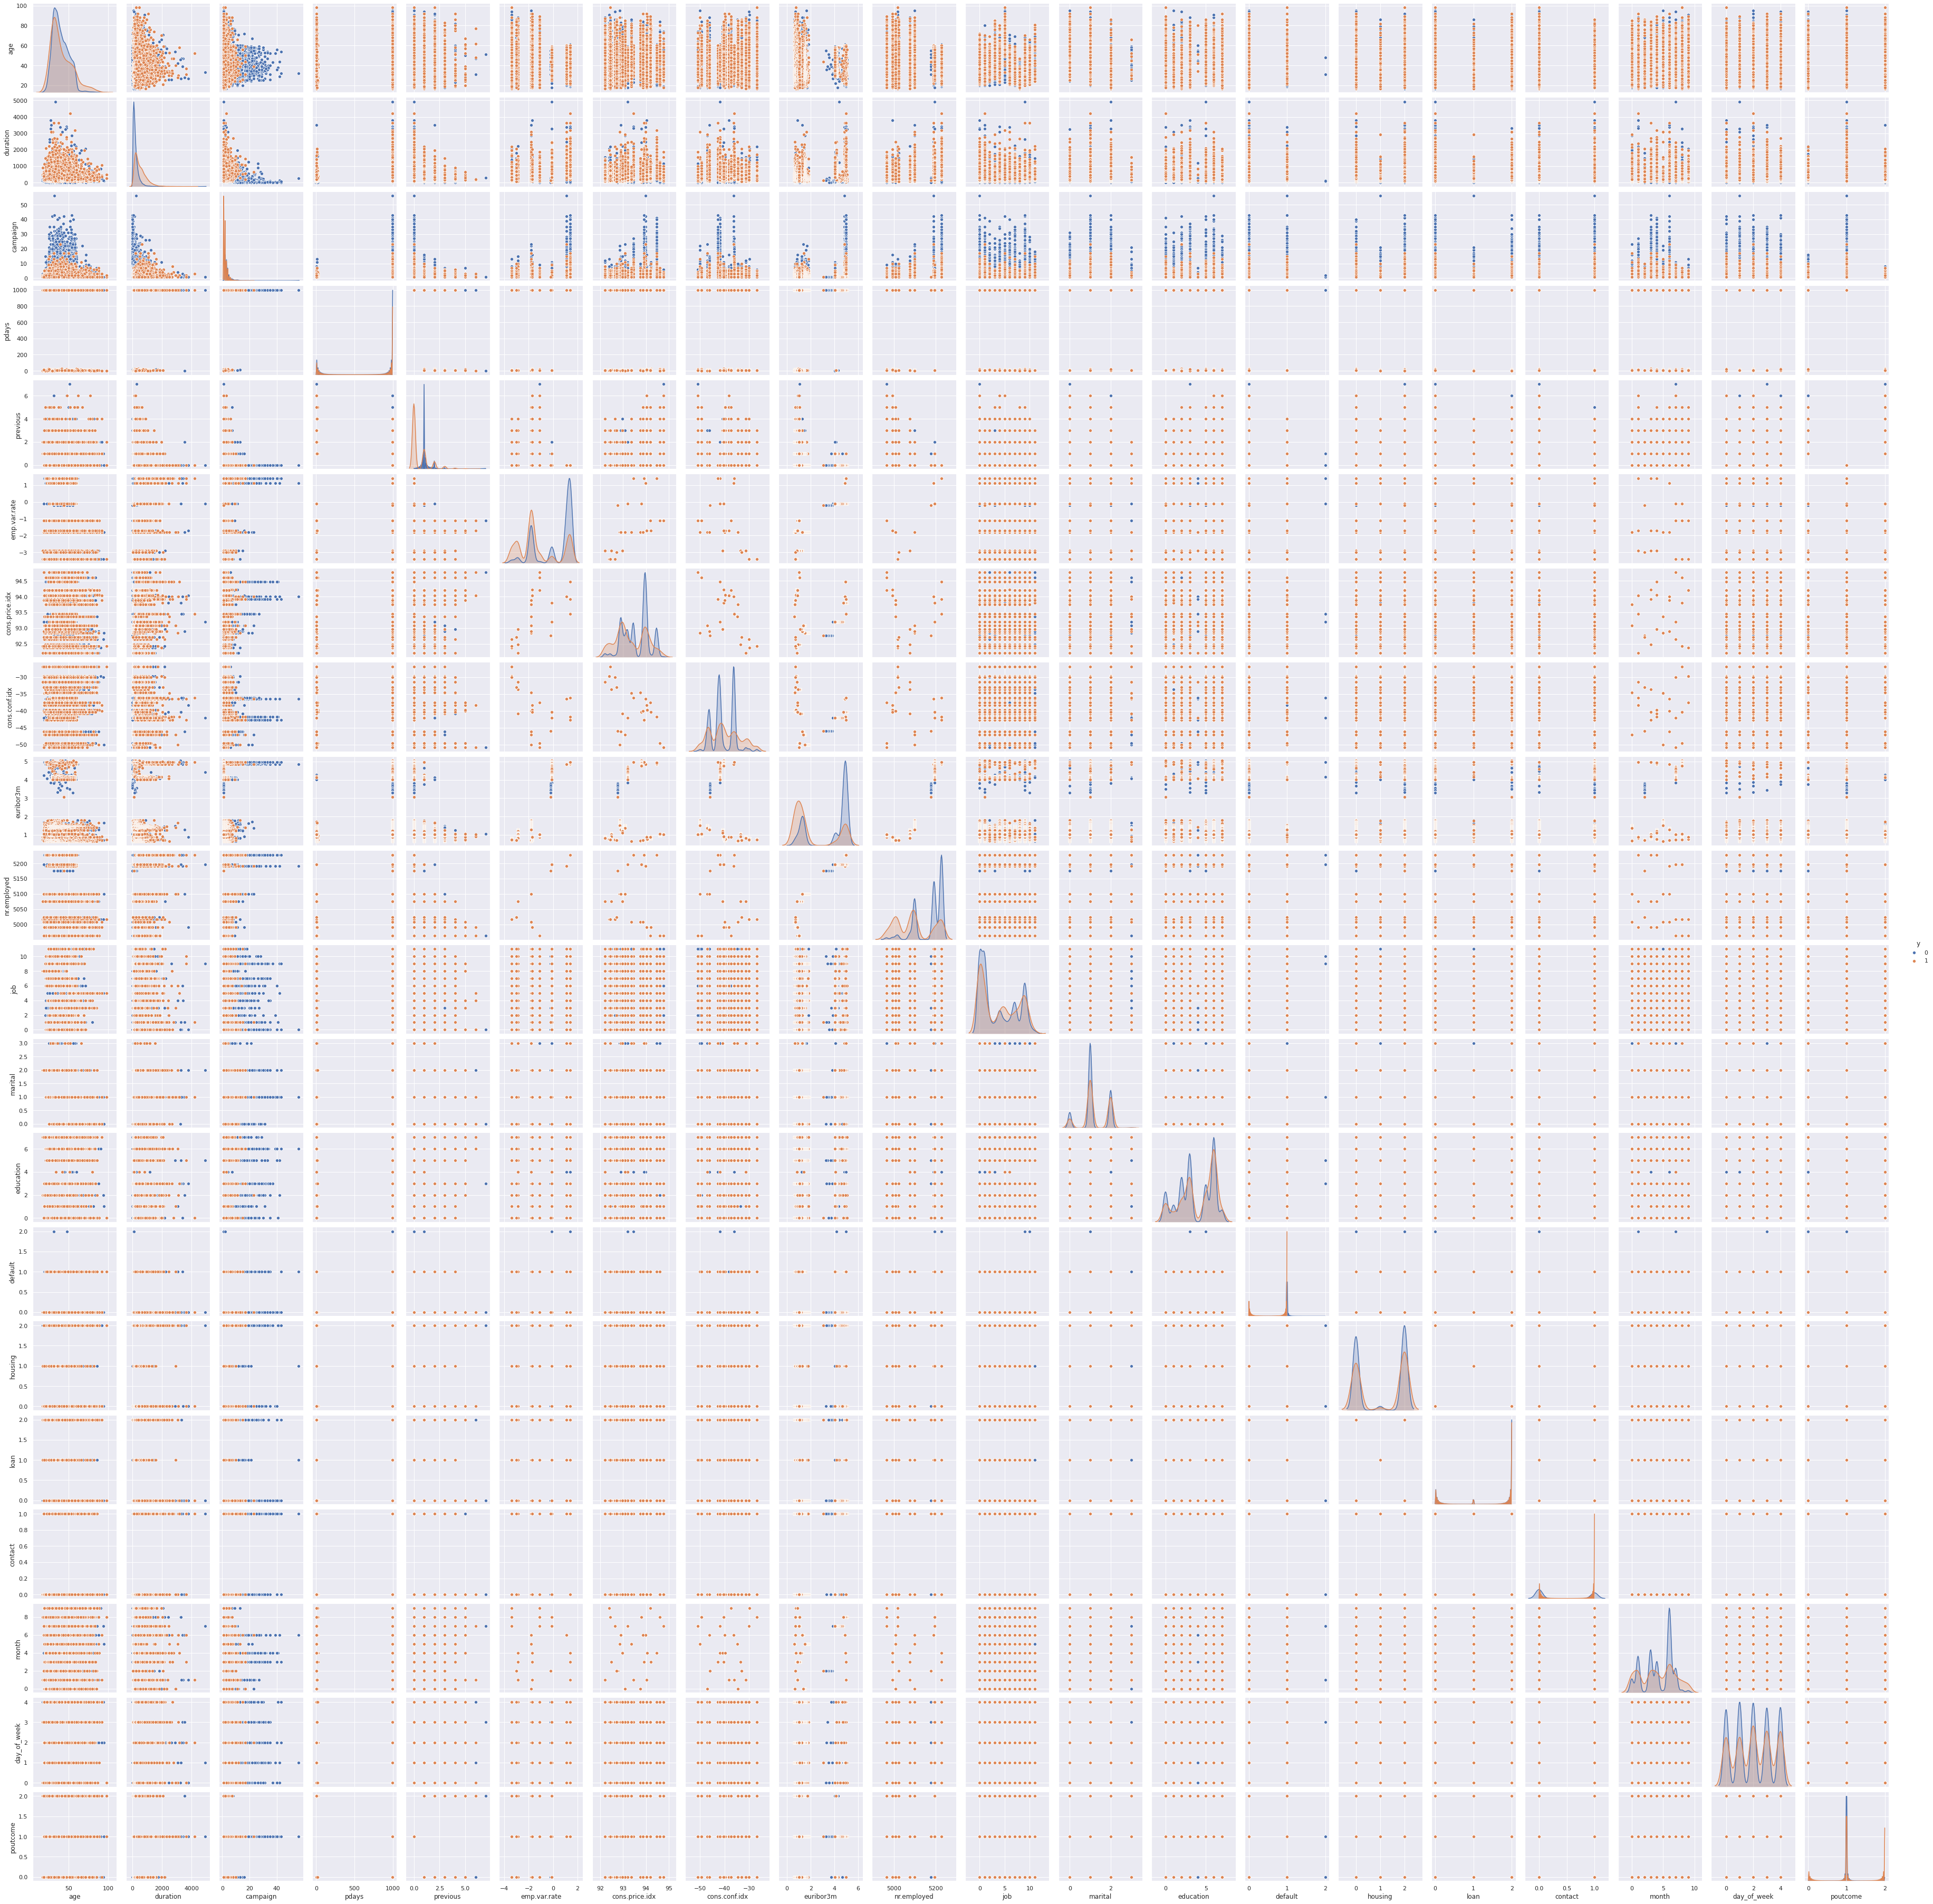

In [0]:
sns.pairplot(df_2, hue = 'y')

###### On va décomposer l'ensemble des données en deux groupes : (X Decomposing the dataset into two groups (X pour les données qui ont un lien avec les clients) and (Y pour les données qui ont un lien avec la campagne et la banque ) 

In [0]:
X = df_2[["age","job","marital","education","default","housing","loan","contact","month","day_of_week","duration","y"]]
Y = df_2[["campaign","poutcome","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"]]
X_cn = X.shape[1]
Y_cn = Y.shape[1]

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41188 non-null  int64  
 1   job          41188 non-null  float64
 2   marital      41188 non-null  float64
 3   education    41188 non-null  float64
 4   default      41188 non-null  float64
 5   housing      41188 non-null  float64
 6   loan         41188 non-null  float64
 7   contact      41188 non-null  float64
 8   month        41188 non-null  float64
 9   day_of_week  41188 non-null  float64
 10  duration     41188 non-null  int64  
 11  y            41188 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 3.8 MB


In [0]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   campaign        41188 non-null  int64  
 1   poutcome        41188 non-null  float64
 2   pdays           41188 non-null  int64  
 3   previous        41188 non-null  int64  
 4   emp.var.rate    41188 non-null  float64
 5   cons.price.idx  41188 non-null  float64
 6   cons.conf.idx   41188 non-null  float64
 7   euribor3m       41188 non-null  float64
 8   nr.employed     41188 non-null  float64
 9   y               41188 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 3.1 MB


###### Centrer réduire les deux groupes X et Y et visualiser les premières 4 lignes de ces matrices. On procèdera a effectuer ce calcul en programmant à la main, puis en utilisant StandardScaler de sklearn.

Pour chaque variable et pour chaque groupe, caluler la moyenne et la variance en tulisant la bibliothèque statistics 

In [0]:
import statistics as st
avgs_X, avgs_Y = [st.mean(X[column]) for column in X.keys()], [st.mean(Y[column]) for column in Y.keys()]
variances_X, variances_Y = [st.variance(X[column]) for column in X.keys()], [st.variance(Y[column]) for column in Y.keys()]

Construire la matrice centrée réduite de l'ensemble X en la programmant par nous même

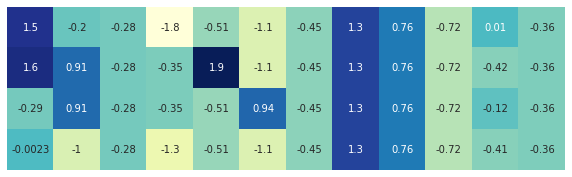

In [0]:
standard_matrix_X = []
for index, column in enumerate(X.keys()):
  line = []
  for value in X[column].values:
    line.append( (value-avgs_X[index])/sqrt(variances_X[index]) )
  standard_matrix_X.append(line)
hand_made_scaled_X = np.asmatrix(standard_matrix_X).transpose()
plt.figure(figsize=(10, 3))
sns.heatmap(hand_made_scaled_X[0:4], cmap="YlGnBu", annot=True, cbar=False,xticklabels=False, yticklabels=False)

Construire la matrice centrée réduite de l'ensemble X en utilisant StandardScaler de sklearn, et on compare la matrice avec celle en dessus pour verfifier notre calcul

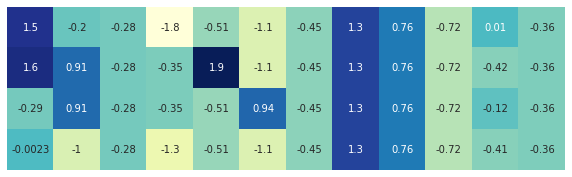

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

scaled_data_X = std_scaler.fit_transform(X)
plt.figure(figsize=(10, 3))
sns.heatmap(scaled_data_X[0:4], cmap="YlGnBu", annot=True, cbar=False,xticklabels=False, yticklabels=False)

Construire la matrice centrée réduite de l'ensemble Y en la programmant par nous même

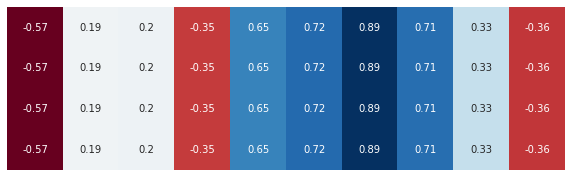

In [0]:
standard_matrix_Y = []
for index, column in enumerate(Y.keys()):
  line = []
  for value in Y[column].values:
    line.append( (value-avgs_Y[index])/sqrt(variances_Y[index]) )
  standard_matrix_Y.append(line)
hand_made_scaled_Y = np.asmatrix(standard_matrix_Y).transpose()
plt.figure(figsize=(10, 3))
sns.heatmap(hand_made_scaled_Y[0:4], cmap="RdBu", annot=True, cbar=False,xticklabels=False, yticklabels=False)

Construire la matrice centrée réduite de l'ensemble Y en utilisant StandardScaler de sklearn

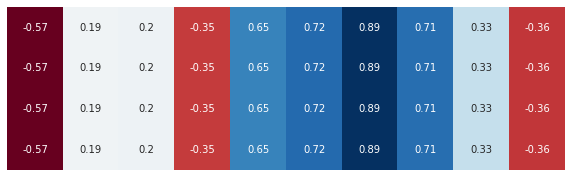

In [0]:
scaled_data_Y = std_scaler.fit_transform(Y)
plt.figure(figsize=(10, 3))
sns.heatmap(scaled_data_Y[0:4], cmap="RdBu", annot=True, cbar=False,xticklabels=False, yticklabels=False)

###### Calculer l'intra et inter covariances (ou corrélations) et les visualiser avec searbon. Le calcul se fera en la programmant par nous même puis en utilisant la fonction corr() de la bibliothèque panda

On va commancer par calculer matrice de correlation de **X** en la programmant par nous même.


$CorrelationMatrix = \frac{1}{n} \times StandardMatrix^T \times StandardMatrix$

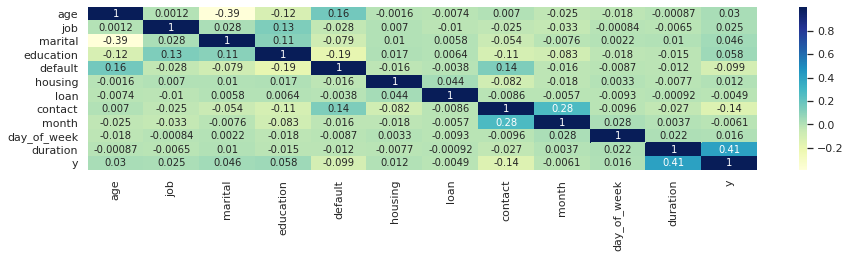

In [0]:
hand_correlation_X_X = (1/X.shape[0]) * hand_made_scaled_X.transpose().dot(hand_made_scaled_X)
xx = pd.DataFrame(hand_correlation_X_X, index=X.keys(), columns=X.keys())
plt.figure(figsize=(15, 3))
sns.heatmap(xx, cmap="YlGnBu", annot=True)

Calcul de la matrice de correlation de **X** en utilisant corr() function de panda

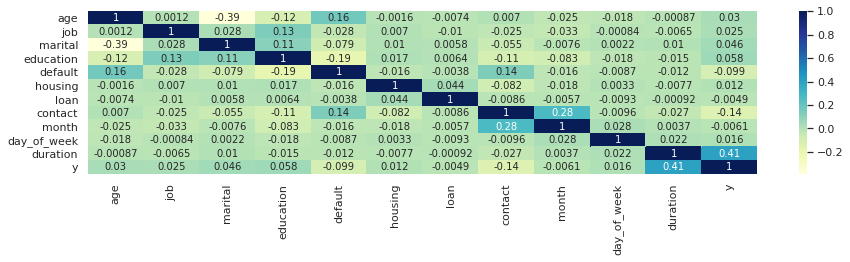

In [0]:
correaltion_X = X.corr()
plt.figure(figsize=(15, 3))
sns.heatmap(correaltion_X, cmap="YlGnBu", annot=True)

 Calculer la matrice de correlation de **Y** en la programmant par nous même.

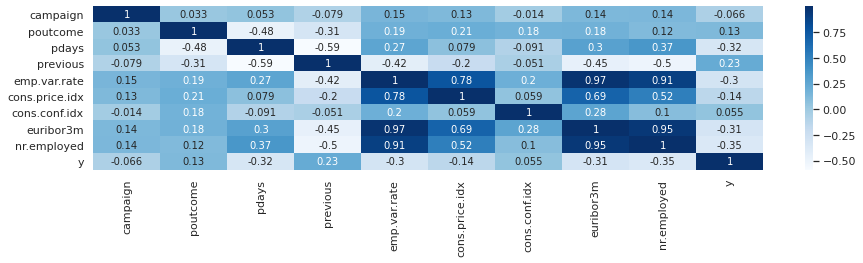

In [0]:
hand_correlation_Y_Y = (1/Y.shape[0]) * hand_made_scaled_Y.transpose().dot(hand_made_scaled_Y)
yy = pd.DataFrame(hand_correlation_Y_Y, index=Y.keys(), columns=Y.keys())
plt.figure(figsize=(15, 3))
sns.heatmap(yy, cmap="Blues", annot=True)

Calcul de la matrice de correlation de **Y** en utilisant corr() function de panda

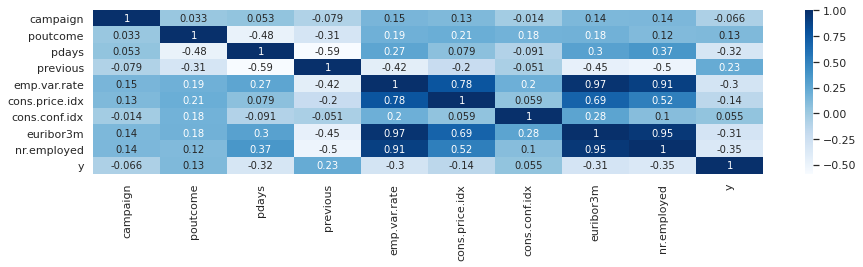

In [0]:
correaltion_Y = Y.corr()
plt.figure(figsize=(15, 3))
sns.heatmap(correaltion_Y, cmap="Blues", annot=True)

Calcul de la matrice de correlation entre le groupe **X** et **Y** 

$CorrelationMatrix_{XY} = \frac{1}{n} \times StandardMatrix_X^T \times StandardMatrix_Y$

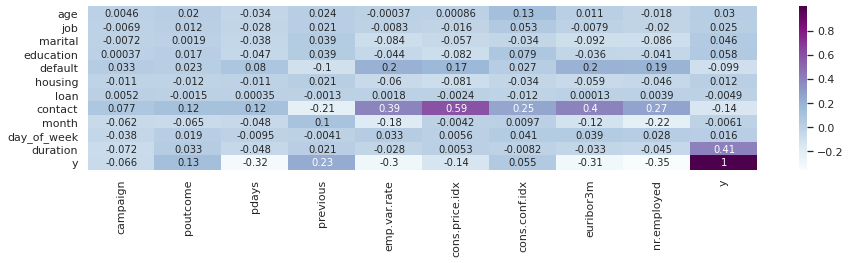

In [0]:
hand_correlation_X_Y = (1/Y.shape[0]) * hand_made_scaled_X.transpose().dot(hand_made_scaled_Y)
xy = pd.DataFrame(hand_correlation_X_Y, index=X.keys(), columns=Y.keys())
plt.figure(figsize=(15, 3))
sns.heatmap(xy, cmap="BuPu", annot=True)

Calcul de la matrice de correlation entre le groupe X et Y en utilisant coerrcoef de **numpy Library**

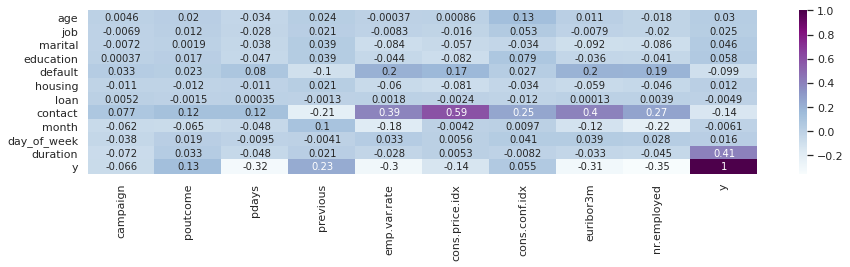

In [0]:
corr_x_y = np.corrcoef(X.T, Y.T)
corr_x_y = pd.DataFrame(corr_x_y[0:12,12:22], index=X.keys(), columns=Y.keys())
plt.figure(figsize=(15, 3))
sns.heatmap(corr_x_y, cmap="BuPu", annot=True)

Calcul de la matrice de correlation entre le groupe **Y** et **X**

$CorrelationMatrix_{YX} = \frac{1}{n} \times StandardMatrix_Y^T \times StandardMatrix_X$

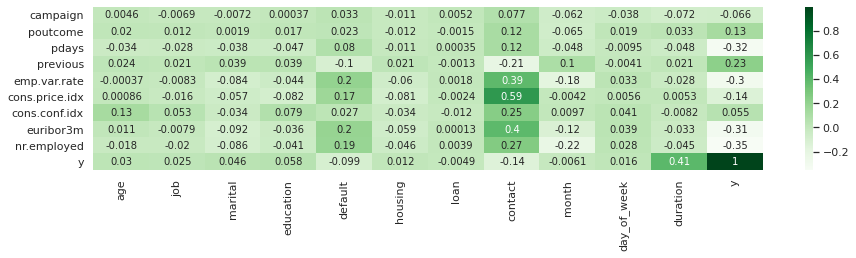

In [0]:
hand_correlation_Y_X = (1/Y.shape[0]) * hand_made_scaled_Y.transpose().dot(hand_made_scaled_X)
yx = pd.DataFrame(hand_correlation_Y_X, index=Y.keys(), columns=X.keys())
plt.figure(figsize=(15, 3))
sns.heatmap(yx, cmap="Greens", annot=True)

Calcul de la matrice de correlation entre le groupe **Y** et **X** en utilisant coerrcoef de numpy Library

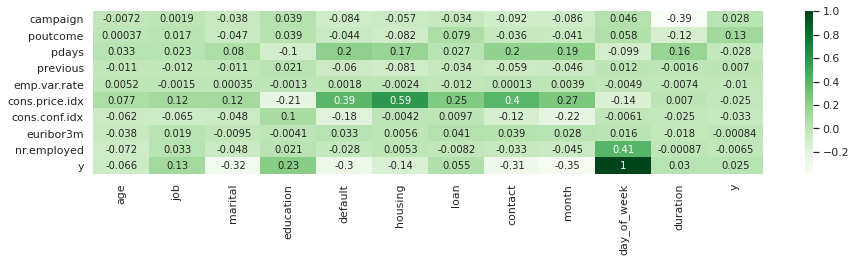

In [0]:
corr_y_x = np.corrcoef(Y.T, X.T)
corr_y_x = pd.DataFrame(corr_y_x[12:22,0:12], index=Y.keys(), columns=X.keys())
plt.figure(figsize=(15, 3))
sns.heatmap(corr_y_x, cmap="Greens", annot=True)

Calculer  $R_X$ and $R_Y$ respéctivement afin de récupérer les valeurs propres 

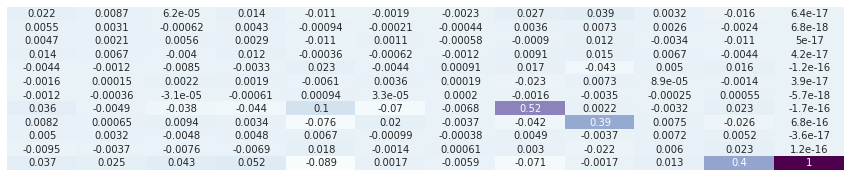

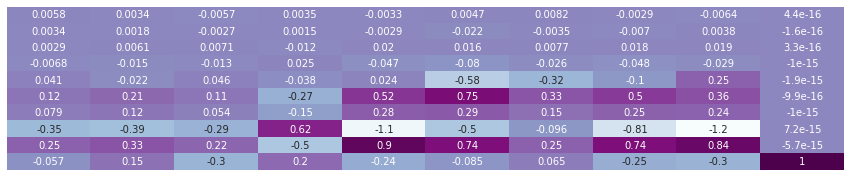

In [0]:
R_X = np.dot(np.dot(np.linalg.inv(hand_correlation_X_X), hand_correlation_X_Y), np.dot(np.linalg.inv(hand_correlation_Y_Y), hand_correlation_Y_X))
plt.figure(figsize=(15, 3))
sns.heatmap(R_X, cmap="BuPu", annot=True, cbar=False,xticklabels=False, yticklabels=False, )
R_Y = np.dot(np.dot(np.linalg.inv(hand_correlation_Y_Y), hand_correlation_Y_X), np.dot(np.linalg.inv(hand_correlation_X_X), hand_correlation_X_Y))
plt.figure(figsize=(15, 3))
sns.heatmap(R_Y, cmap="BuPu", annot=True, cbar=False,xticklabels=False, yticklabels=False)

Calculer les valeurs propres $\lambda_k$, les vecteurs propres $a_k$, et $b_k$ respéctivement depuis les matrices qu'on dejà calculé ci-dessus ($R_X$) et ($R_Y$). Ensuite, on va afficher $a_1$ et $b_1$ qui correspondent au premiers vecteurs propres de $R_X$ et $R_Y$ respectivement. 

λ_a :  [1.00000000e+00 5.29382728e-01 3.93917990e-01 4.66464894e-02
 2.76867817e-02 3.50167686e-03 1.44400644e-03 6.30385827e-04
 3.93865182e-04 2.23894722e-05 1.11895754e-19 1.11895754e-19]
λ_b :  [1.00000000e+00 5.29382728e-01 3.93917990e-01 4.66464894e-02
 2.76867817e-02 3.50167686e-03 1.44400644e-03 2.23894722e-05
 6.30385827e-04 3.93865182e-04]


Text(0.5, 1.0, 'Eigenvectors b_1 of RY')

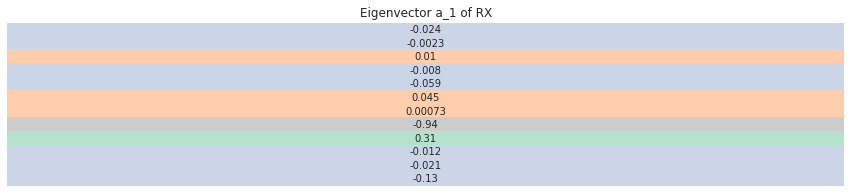

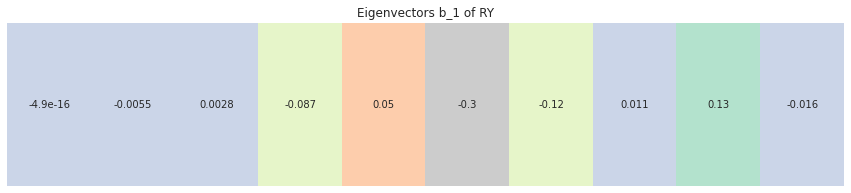

In [0]:
from numpy.linalg import eig
lambda_a, a = eig(R_X)
plt.figure(figsize=(15, 3))
print("λ_a : ",lambda_a.real)
sns.heatmap(a.real[:,1], cmap="Pastel2_r", annot=True, cbar=False,xticklabels=False, yticklabels=False).set_title('Eigenvector a_1 of RX')
lambda_b, b = eig(R_Y)
print("λ_b : ",lambda_b)
plt.figure(figsize=(15, 3))
sns.heatmap(b.real[:1], cmap="Pastel2_r", annot=True, cbar=False,xticklabels=False, yticklabels=False).set_title('Eigenvectors b_1 of RY')

Calculer les composantes canoniques $U_K$ et $V_K$ (on va avoir 12 CC (canonical components) pour le premier groupe **X** et 10 CC pour le second groupe **Y**) 

$U_K = a_k^T \times X $ et 
$V_K = b_k^T \times Y $

In [0]:
U,V = pd.DataFrame(np.dot(hand_made_scaled_X,a.real), columns=["U"+str(i) for i in range(1,X_cn+1)]), pd.DataFrame(np.dot(hand_made_scaled_Y,b.real), columns=["V"+str(i) for i in range(1,Y_cn+1)])

Cacul de la matrice de correlation entre les composantes canoniques (en la programmant par nous même, ensuite en utilisant $corrcoef()$

Nous allons créer une fonction qui calcule la matrice centrée réduite afin d'éviter la répétition du même code .

In [0]:
def compute_scaled_mat(matrix,variance,avg):
  std_mtrx = []
  for index, column in enumerate(matrix.keys()):
    line = []
    for value in matrix[column].values:
      line.append( (value-avg[index])/sqrt(variance[index]) )
    std_mtrx.append(line)
  return np.asmatrix(std_mtrx).transpose()

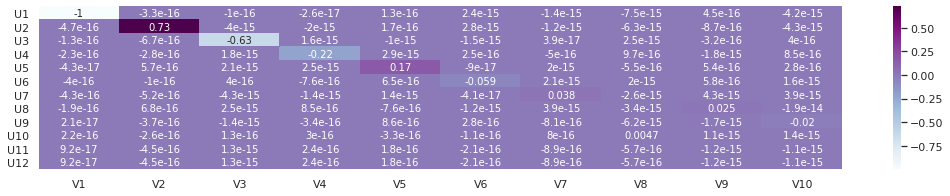

In [0]:
avgs_U, avgs_V = [st.mean(U[column]) for column in U.keys()], [st.mean(V[column]) for column in V.keys()]
variances_U, variances_V = [st.variance(U[column]) for column in U.keys()], [st.variance(V[column]) for column in V.keys()]

hand_made_scaled_U = compute_scaled_mat(U,variances_U,avgs_U)
hand_made_scaled_V = compute_scaled_mat(V,variances_V,avgs_V)

hand_correlation_U_V = (1/Y.shape[0]) * hand_made_scaled_U.transpose().dot(hand_made_scaled_V)
uv = pd.DataFrame(hand_correlation_U_V, index=U.keys(), columns=V.keys())
plt.figure(figsize=(18, 3))
sns.heatmap(uv, cmap="BuPu", annot=True)

Cacul de la matrice de correlation entre les composantes canoniques utilisant  corrcoef()

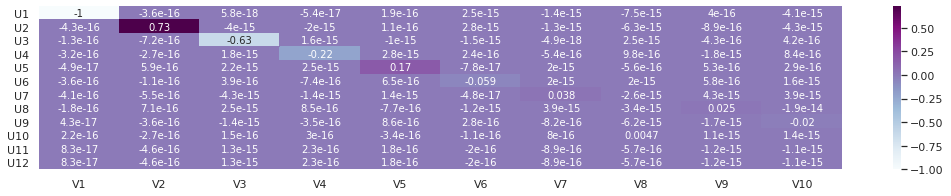

In [0]:
corr_u_v = np.corrcoef(U.T, V.T)
corr_u_v = pd.DataFrame(corr_u_v[0:12,12:22], index=U.keys(), columns=V.keys())
plt.figure(figsize=(18, 3))
sns.heatmap(corr_u_v, cmap="BuPu", annot=True)

Cacul de la matrice de correlation entre les composantes canoniques utilisant sklearn

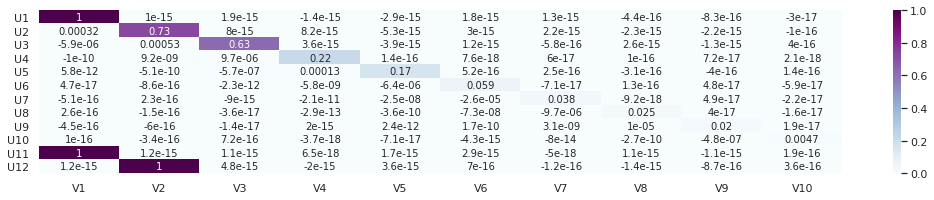

In [0]:
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=10,scale=True)
cca.fit(X, Y)
U_, V_ = cca.transform(X, Y)
corr_cca2 = pd.DataFrame(np.asmatrix(np.corrcoef(U_.T, V_.T))[0:12,10:22],index=U.keys(), columns=V.keys())
plt.figure(figsize=(18, 3))
sns.heatmap(corr_cca2, cmap="BuPu", annot=True)

On peut constater qu'il existe une correlation entre une composante $U_K$ du gourpe $X$ et une composante $V_K$ du groupe $Y$ si seuelement $K$ de $V$ = $K$ de $U$.
Exemple : $V_2$ et $U_2$ ont une forte corrélation positive de **$0.73$**

###### Calcul des composantes principales
il existe 6 compsantes canoniques qui nous interssent ( de $U_1$ à $U_6$ et de $V_1$ à $V_6$) car on a constaté qu'il existe des corrélation entre ces derniers. Donc on propose de calculer 6 composantes principales. 


$C_k = \frac{1}{2} \times (U_k+V_k)$ 

In [0]:
principal_components = []
for index, u in enumerate(U.keys()):
  if index == 6:
    break
  v = "V"+str(index+1)
  principal_components.append([sum(x)*(1/2) for x in zip(U[u],V[v])])
  
# each column is a principal component  
principal_components = np.asmatrix(principal_components).transpose()
C = pd.DataFrame(principal_components, columns=["C1","C2","C3","C4","C5","C6"])

On va calculer cette corrélation on la programmant par nous même.
On commencera par fusionner les deux groupe **$X$** et **$Y$**

In [0]:
scaled_X_df = pd.DataFrame(hand_made_scaled_X, columns=X.columns)
scaled_Y_df = pd.DataFrame(hand_made_scaled_Y, columns=Y.columns)
del scaled_X_df['y']
S = pd.concat([scaled_X_df,scaled_Y_df], axis=1)

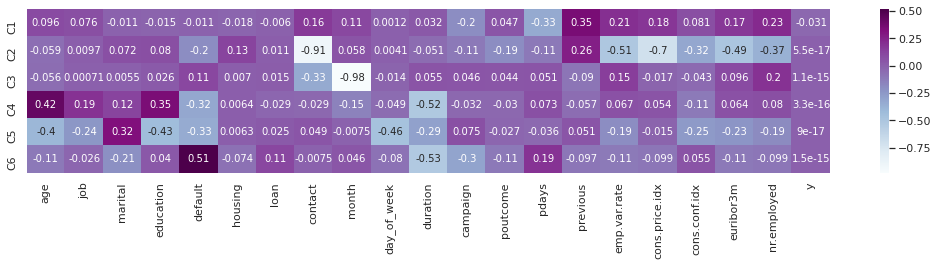

In [0]:
avgs_C = [st.mean(C[column]) for column in C.keys()]
variances_C = [st.variance(C[column]) for column in C.keys()]

hand_made_scaled_C = compute_scaled_mat(C,variances_C,avgs_C)

hand_correlation_C_S = (1/S.shape[0]) * hand_made_scaled_C.transpose().dot(np.asmatrix(S))
cs = pd.DataFrame(hand_correlation_C_S, index=C.keys(), columns=S.keys())
plt.figure(figsize=(18, 3))
sns.heatmap(cs, cmap="BuPu", annot=True)

Calcul de la matrice de coorelation en utilisant **$coercoef()$** de la **$numpy$**

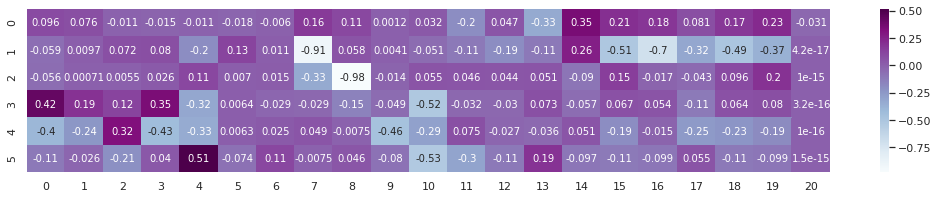

In [0]:
corvar = np.asmatrix(np.corrcoef(C.T, S.T))[0:6,6:28]
plt.figure(figsize=(18, 3))
sns.heatmap(corvar, cmap="BuPu", annot=True)

Cacluler le cercle de correlation entre les variables sur les deux axes qui représentent les deux premières composantes $C1$ et $C2$

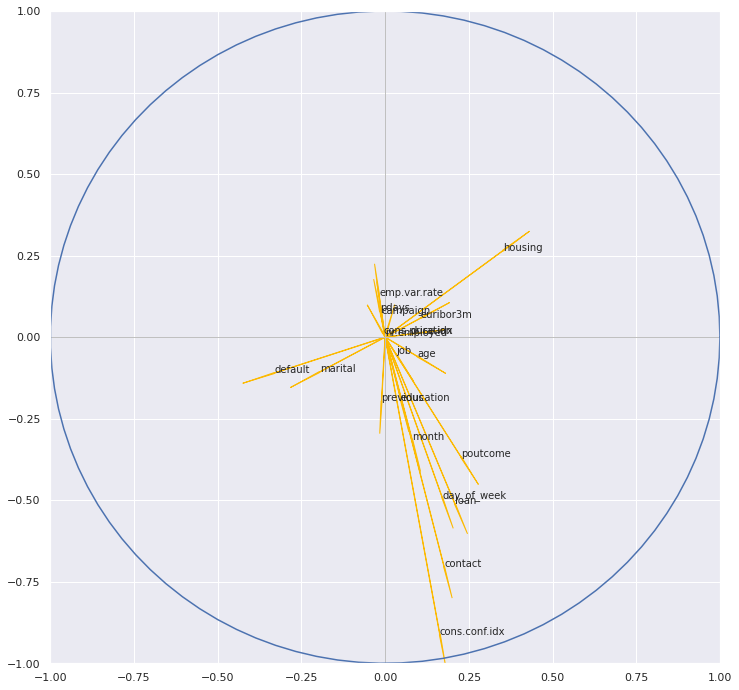

In [0]:
(fig, ax) = plt.subplots(figsize=(12, 12))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

for j in range(new_df.shape[1]):
     plt.annotate(new_df.columns[j],(hand_correlation_C_S[0,j],hand_correlation_C_S[1,j]))
     ax.arrow(0,
             0,  # Start the arrow at the origin
             corvar[0,j],  #0 for PC1
             corvar[1,j],  #1 for PC2
             head_length=0.1,
             color="#fcba03")
# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an)) 
# Print the correlation circle
plt.show()